# Part -1

## Q-1. Poisson Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
from scipy.optimize import minimize
from scipy.special import gamma


In [2]:
df = pd.read_csv('billboard.csv')
df.head(5)

,EXPOSURES,PEOPLE
0,0,48
1,1,37
2,2,30
3,3,24
4,4,20


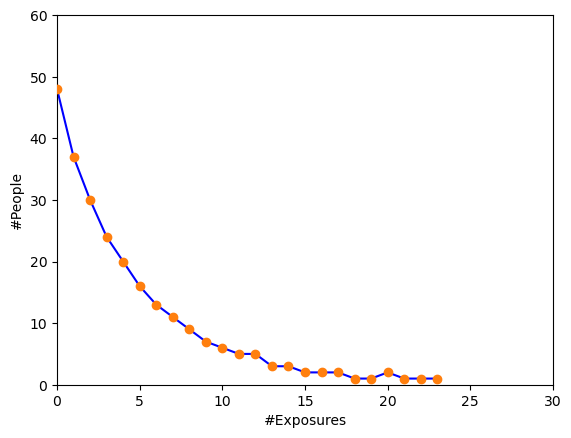

In [3]:
#Plot the data
plt.xlim([0,30])
plt.ylim([0,60])
plt.xlabel('#Exposures')
plt.ylabel('#People')
plt.scatter(df.EXPOSURES,df.PEOPLE, color='tab:orange',zorder=3)
plt.plot(df.EXPOSURES,df.PEOPLE, color='blue',zorder=2)
plt.show();

## Maximum Log Likelihood

In [4]:

def LL (params, k,n):
    lambdaa = params
    prob = [] #P(X=x)
    lle=[] # log likelihood
    ads = list(df['PEOPLE'])
    pds = list(range(0,len(df.EXPOSURES)))
    
    for k in pds:
        prob.append(((lambdaa**k))* (np.exp(-lambdaa))/ (math.factorial(k)))
    for k in range(len(ads)):
        lle.append(math.log(prob[k])*ads[k])
    return lle
                   
        

## Negative Log Likelihood

In [5]:
def NLL(params,k,n):
    return (-np.sum(LL(params,k,n)))

## Specify the Optimizer

In [6]:
# inital feasible guess for the lambdaa
params = np.array((0.5))
n = np.array(df.PEOPLE[0])
k = np.array(df.EXPOSURES[0])

In [7]:
soln =minimize(
    NLL,
    args = (k, n),
    x0 = np.array((0.5)),
    )

In [8]:
soln

      fun: 929.0438827272923
 hess_inv: array([[0.01781903]])
      jac: array([-7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 10
     njev: 11
   status: 0
  success: True
        x: array([4.45599989])

In [11]:
print('Maximum Log Likelihood',-1* soln.fun)

Maximum Log Likelihood -929.0438827272923


In [10]:
lambdaa = round(soln.x[0],3)
print("Lambda parameter ",lambdaa)

Lambda parameter  4.456


# Q2. NBD Model

### Maximum Loglikelihood

In [12]:
def LL (params, k):
    a,n = params
    
    prob = [] #P(X=x)
    lle=[] # log likelihood
    ads = list(df['PEOPLE'])
    pds = list(range(0,len(df.EXPOSURES)))
    
    for k in pds:
        gaa= gamma(n+k)/(gamma(n)*(math.factorial(k)))

        alpha = ((a)/(1+a))**n
        alpha_1 = (1/(1+a)**k)
        answer = (gaa * alpha * alpha_1)
        prob.append(ads[k] * np.log(answer))
        
    return prob

### Negative Loglikelihood

In [13]:
def NLL (params, k):
    return (-np.sum(LL(params, k)))

## Specify the Optimizer

In [14]:
# initial guess for a(alpha),n
params = [0.5,0.5]

k = np.array(df.EXPOSURES[0])
bounds = [(0.00001,None), (0.00001, None)]


In [15]:
soln = minimize(
    NLL,
    args = k,
    x0 = params,
    bounds=[(0.00001,0.9999999)],
    tol=1e-10,
    options={'ftol' : 1e-8},
    
)

In [16]:
soln

      fun: 649.68882748604
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00263753, -0.00010232])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 45
      nit: 10
     njev: 15
   status: 0
  success: True
        x: array([0.21751988, 0.96926577])

In [17]:
params = soln.x
print('Alpha = ',round(params[0],6))
print('n = ',round(params[1],6))

Alpha =  0.21752
n =  0.969266


# Q3. Poisson Regression Model

In [19]:
df = pd.read_csv('khakichinos.csv')
df1 = df.copy()
df1 = df.drop(columns=['ID'],axis=1)
#df1

### Maximum Loglikelihood

In [20]:
def LL(params,m):   
    # Loop to find the lambda_i
    l0 , beta1 , beta2, beta3, beta4 = params
    li=[]
    for i in range(len(df1)):
        x=list(df1.iloc[i,1:])


        for i in x:
            x1,x2,x3,x4 = x[0],x[1],x[2],x[3]
        answer = (beta1 * x1 + beta2 * x2 + beta3 * x3 + beta4 *x4)
        li.append(l0 * math.exp(answer))
        
    print()
    print('lo= ',l0)
    print('B1=',beta1)
    print('B2= ', beta2)
    print('B3= ',beta3)
    print('B4= ', beta4)
    print()
    prob=[]
    K=list(df1.NumberofVisits)
    for i in range(len(li)):
        lambdaa=li[i]
        k = K[i]
        answer=((math.pow(lambdaa,k))* (np.exp(-lambdaa))/ (math.factorial(k)))
        prob.append(math.log(answer))
    
    return prob

In [21]:
## Negative Log Likelihood
def NLL (params,m):
    return(-np.sum(LL(params,m)))

In [22]:
## Specify optimizer

params = np.array((0.1,0.1,0.1,0.1,0.1))
k = np.array((df1.NumberofVisits))
bounds = [(0.000001, None),(None, None),(None, None),(None, None),(None, None)]

In [23]:

soln = minimize(
    NLL,
    args = k,
    x0 = params,
    method='Nelder-Mead',
    bounds=bounds,
    tol=1e-10,
    )


lo=  0.1
B1= 0.1
B2=  0.1
B3=  0.1
B4=  0.1


lo=  0.10500000000000001
B1= 0.1
B2=  0.1
B3=  0.1
B4=  0.1


lo=  0.1
B1= 0.10500000000000001
B2=  0.1
B3=  0.1
B4=  0.1


lo=  0.1
B1= 0.1
B2=  0.10500000000000001
B3=  0.1
B4=  0.1


lo=  0.1
B1= 0.1
B2=  0.1
B3=  0.10500000000000001
B4=  0.1


lo=  0.1
B1= 0.1
B2=  0.1
B3=  0.1
B4=  0.10500000000000001


lo=  0.10200000000000001
B1= 0.10200000000000001
B2=  0.10200000000000001
B3=  0.10200000000000001
B4=  0.10200000000000001


lo=  0.10300000000000004
B1= 0.10300000000000004
B2=  0.10300000000000004
B3=  0.10300000000000004
B4=  0.10300000000000004


lo=  0.10319999999999999
B1= 0.10319999999999999
B2=  0.09619999999999998
B3=  0.10319999999999999
B4=  0.10319999999999999


lo=  0.10479999999999995
B1= 0.10479999999999995
B2=  0.09179999999999994
B3=  0.10479999999999995
B4=  0.10479999999999995


lo=  0.10511999999999996
B1= 0.10511999999999996
B2=  0.09791999999999995
B3=  0.10511999999999996
B4=  0.09811999999999996


lo=  0.107167


lo=  0.1522519773544387
B1= 0.10346555913682873
B2=  0.19450547270180582
B3=  0.2266423359933469
B4=  -0.06805244071577805


lo=  0.15033817543666
B1= 0.10674482389274578
B2=  0.23681814095647857
B3=  0.26785863390537457
B4=  -0.1310061365649854


lo=  0.14257561368532207
B1= 0.10244523971515805
B2=  0.1864128200614788
B3=  0.216149437085724
B4=  -0.05275011904367984


lo=  0.13212579526481855
B1= 0.11302668750541756
B2=  0.15679825734728253
B3=  0.1790471358249367
B4=  -0.0035991069163575085


lo=  0.1483336195738009
B1= 0.10095753469565094
B2=  0.21287602401374905
B3=  0.24521766488153846
B4=  -0.09474184305195249


lo=  0.1320427024749197
B1= 0.10549240235117979
B2=  0.20120961807282525
B3=  0.2271094392872721
B4=  -0.07134518223220006


lo=  0.14719965863455897
B1= 0.1039722699404165
B2=  0.19618150904456066
B3=  0.2267591118168282
B4=  -0.06887562609488355


lo=  0.15491319603398918
B1= 0.10190653859651988
B2=  0.21893297795472522
B3=  0.24286845539529067
B4=  -0.1054550236324448


lo=  0.13837141903276104
B1= 0.01392549402238825
B2=  0.03663424423579758
B3=  0.5157269806733851
B4=  -0.046236701463381664


lo=  0.13410949782377007
B1= 0.012871413789534453
B2=  0.015024286433606992
B3=  0.5164660802080709
B4=  -0.023235147589390798


lo=  0.14111651416664295
B1= 0.00808359984935113
B2=  0.017071605954651358
B3=  0.5329954816774657
B4=  -0.038520783061806035


lo=  0.13880041069134516
B1= 0.00749009026373533
B2=  0.015938520519849293
B3=  0.5339740346100328
B4=  -0.035848915670876814


lo=  0.14095246029009867
B1= 0.007611540540614869
B2=  0.01353000500488755
B3=  0.5334033444178685
B4=  -0.032076826392223215


lo=  0.13570399993959656
B1= 0.006819487057181389
B2=  0.015412647701121867
B3=  0.5351855385212588
B4=  -0.03406394040306797


lo=  0.13546858677616772
B1= -0.0026008870384858947
B2=  -0.015552682578247011
B3=  0.561239390106022
B4=  -0.01569733224473229


lo=  0.13764571096861272
B1= 0.009793898757169713
B2=  0.02358751253228643
B3=  0.5271050830315442
B4


lo=  0.10418660459411538
B1= 0.028216305096232373
B2=  -0.009628216878734929
B3=  0.5417547828593807
B4=  -0.026896247065246008


lo=  0.10310319021385425
B1= 0.026271252942248267
B2=  -0.015739786855610845
B3=  0.5532467640558856
B4=  -0.028235423556592996


lo=  0.0978208389151704
B1= 0.025980845931677474
B2=  -0.026789981765766656
B3=  0.5679827600167711
B4=  -0.027577517932123527


lo=  0.09951940116112667
B1= 0.03585963857720088
B2=  -0.008037923632476303
B3=  0.5358320959290421
B4=  -0.030485354576845695


lo=  0.09267447390258599
B1= 0.04387082125675254
B2=  -0.009329322948472276
B3=  0.5314309489352373
B4=  -0.031943934291012666


lo=  0.09580020121782928
B1= 0.04281285846690201
B2=  -0.0002914171004593166
B3=  0.5271254274627342
B4=  -0.03730353704566485


lo=  0.08642483271896537
B1= 0.04806595806389967
B2=  -0.0124449638019717
B3=  0.5276771956078357
B4=  -0.028145095235792464


lo=  0.10608524150739454
B1= 0.030021557042798578
B2=  -0.0031424611951473137
B3=  0.53765827923


lo=  0.07281514150202548
B1= 0.060002346950616264
B2=  -0.03701739578398965
B3=  0.557849902402012
B4=  -0.03691669958312352


lo=  0.0732913894139357
B1= 0.06690570436888503
B2=  -0.023341256329924277
B3=  0.5396776441737359
B4=  -0.04342125877098515


lo=  0.07311427066773699
B1= 0.06564501511203723
B2=  -0.027194365640222394
B3=  0.5448041560207876
B4=  -0.04241111729600311


lo=  0.07087496291935852
B1= 0.06873995069199318
B2=  -0.028725325640868084
B3=  0.5422726356133568
B4=  -0.04136658924539052


lo=  0.06892811077204003
B1= 0.07179494242950929
B2=  -0.030070749529688176
B3=  0.540150921594251
B4=  -0.040959043072403944


lo=  0.0728836335031865
B1= 0.06811241931326356
B2=  -0.024971402750400565
B3=  0.5371562510132277
B4=  -0.041006145417851025


lo=  0.07109431382422504
B1= 0.06738616918462588
B2=  -0.032151276821217295
B3=  0.5448220616391439
B4=  -0.0387086574826585


lo=  0.0712570791777177
B1= 0.07065978889860791
B2=  -0.026280366563845525
B3=  0.5363106096662498
B4=  -0


lo=  0.06527910115564314
B1= 0.07876268247941148
B2=  -0.03284969735997044
B3=  0.5366275378092759
B4=  -0.041887207123659675


lo=  0.06519647538527172
B1= 0.07835322438085708
B2=  -0.03351834404383439
B3=  0.538159390556175
B4=  -0.041980493755842806


lo=  0.06459974039528973
B1= 0.07915185296092238
B2=  -0.03466984833733828
B3=  0.5384065941899226
B4=  -0.041760154793443326


lo=  0.06578458711872981
B1= 0.07767843096436086
B2=  -0.03264054960907199
B3=  0.5375987588454574
B4=  -0.04185142452227934


lo=  0.06551000713956613
B1= 0.07799939065563753
B2=  -0.0334269057944292
B3=  0.5376529332764899
B4=  -0.04137698212635285


lo=  0.06573977132731978
B1= 0.07708219501090899
B2=  -0.03385329115551926
B3=  0.5393802999747553
B4=  -0.04143253517607538


lo=  0.06562460378440062
B1= 0.0775023168780346
B2=  -0.03360239270663205
B3=  0.5386921094333854
B4=  -0.04154620316297146


lo=  0.06599364845734278
B1= 0.07715129010833442
B2=  -0.033218263936774343
B3=  0.5380615347787401
B4=  -0.04


lo=  0.06759406582220359
B1= 0.0753728494611492
B2=  -0.025496407511637897
B3=  0.5379884003593745
B4=  -0.04370100673679139


lo=  0.06607972565647414
B1= 0.07758540538207553
B2=  -0.027800522252018574
B3=  0.537660490351257
B4=  -0.0437537226606067


lo=  0.06559841092150331
B1= 0.07847894279472714
B2=  -0.027153256316709562
B3=  0.5371740621451366
B4=  -0.04422467561797999


lo=  0.06646124336052905
B1= 0.07751023959347259
B2=  -0.02636455981358849
B3=  0.5362506701126657
B4=  -0.0435266123631268


lo=  0.06710485348523998
B1= 0.07711057786212336
B2=  -0.02317324863176174
B3=  0.5353567060587159
B4=  -0.04468106942401867


lo=  0.06669806465371925
B1= 0.0776012758515496
B2=  -0.023046485318746153
B3=  0.5357881996251503
B4=  -0.044898513688879385


lo=  0.06701035739415415
B1= 0.07691349777343298
B2=  -0.022652641522985087
B3=  0.5361729130250998
B4=  -0.04470942653496507


lo=  0.06732938713966927
B1= 0.07661221843426158
B2=  -0.02025849152748141
B3=  0.5358342183899911
B4=  -0.04


lo=  0.06062001021325756
B1= 0.07166971088103478
B2=  -0.0070430573737570185
B3=  0.5682997777931178
B4=  -0.03733302455463311


lo=  0.05976791485147091
B1= 0.07327310647526505
B2=  -0.013036950636285141
B3=  0.5671824032574928
B4=  -0.03630639359966484


lo=  0.06084971727342141
B1= 0.06776417061105691
B2=  0.005899667767113984
B3=  0.5760879902556861
B4=  -0.03644207506224349


lo=  0.05928090874504359
B1= 0.0731082207508168
B2=  0.0003905395640913138
B3=  0.5689500266199113
B4=  -0.03798489500843375


lo=  0.05764211016480647
B1= 0.07611574702890528
B2=  0.0005344383015601886
B3=  0.5670299763706028
B4=  -0.03823804152055815


lo=  0.061317432498368546
B1= 0.06851547678303553
B2=  0.0040671376563188024
B3=  0.5722320341656273
B4=  -0.03580663496573613


lo=  0.06080747028139742
B1= 0.06784434608525566
B2=  0.0014104988551481186
B3=  0.5761926805697706
B4=  -0.034914706939937534


lo=  0.05904902833392733
B1= 0.07213318482904557
B2=  -0.0016119062015117363
B3=  0.5714345031259904
B


lo=  0.05118006789547533
B1= 0.08610022453419788
B2=  0.0018086280423943689
B3=  0.5722858539470199
B4=  -0.04037370781285844


lo=  0.052240936754776424
B1= 0.08365846049330322
B2=  -0.0030817329179222233
B3=  0.5741364278887269
B4=  -0.038081133756543484


lo=  0.05150128281013347
B1= 0.08511054119683908
B2=  -0.006886238547282382
B3=  0.5741425458587051
B4=  -0.03738698279574011


lo=  0.04968314462625162
B1= 0.08675966982504252
B2=  -0.0019814826090348465
B3=  0.5780353765342279
B4=  -0.039685706800703116


lo=  0.0496493326879358
B1= 0.0862550546288855
B2=  -0.0013069859054812586
B3=  0.5803998646322897
B4=  -0.03954745653425571


lo=  0.04775245627655077
B1= 0.08831391291019774
B2=  -0.0016080826763247523
B3=  0.5848161772625589
B4=  -0.0401280210427849


lo=  0.04842494398898513
B1= 0.08979386844666376
B2=  -0.0121300948815945
B3=  0.5788167796060484
B4=  -0.04013004149241564


lo=  0.05203152561411997
B1= 0.08303804537954287
B2=  0.0021079346278834103
B3=  0.5761204111073559
B


lo=  0.0451002890209061
B1= 0.09239399852145433
B2=  0.006694312227552752
B3=  0.5846854138817847
B4=  -0.03600249143167128


lo=  0.044734838881817104
B1= 0.09187278988008762
B2=  0.005259194829737558
B3=  0.5880975125399945
B4=  -0.03582158305038955


lo=  0.04472868069858814
B1= 0.09222275992862741
B2=  0.0030494633976373767
B3=  0.5863910267479242
B4=  -0.034238115069318634


lo=  0.0448573003043407
B1= 0.0922070282728468
B2=  0.006172044992628424
B3=  0.5860957944959084
B4=  -0.03481624246723035


lo=  0.043958729676706054
B1= 0.09332440440886433
B2=  0.003657242449376278
B3=  0.5882681269340115
B4=  -0.03472725641726318


lo=  0.04288258751113186
B1= 0.09480078162274286
B2=  0.0025799685328168395
B3=  0.5902537104309404
B4=  -0.03430150623752029


lo=  0.04503308257721954
B1= 0.09191395225343893
B2=  0.006662680954929617
B3=  0.5869249002006764
B4=  -0.036263554663871336


lo=  0.04372044587864657
B1= 0.09414130996276404
B2=  0.008880623799567375
B3=  0.5874857297011487
B4=  -0.


lo=  0.04405529911794814
B1= 0.0934117764003547
B2=  0.0045409463896320225
B3=  0.588318209937787
B4=  -0.03582898576748289


lo=  0.04401073359042136
B1= 0.09349421374196096
B2=  0.0042055375645656725
B3=  0.5884233978892597
B4=  -0.03586944139795057


lo=  0.044049000451017756
B1= 0.09348230836502275
B2=  0.004005466150837803
B3=  0.5882936825955642
B4=  -0.035905700622670886


lo=  0.04387180813069105
B1= 0.09363343677408606
B2=  0.004136108036928521
B3=  0.5888300916087121
B4=  -0.0358535608311647


lo=  0.04391768087750533
B1= 0.09357802168065321
B2=  0.004237317625104396
B3=  0.5887021211909809
B4=  -0.03584741706524425


lo=  0.043930553596696315
B1= 0.09365408068092167
B2=  0.004402394729352846
B3=  0.5884276415480643
B4=  -0.035911064908516616


lo=  0.0439088211082784
B1= 0.0937588563193181
B2=  0.0044715968271544625
B3=  0.5882837807239438
B4=  -0.035970008606978965


lo=  0.04391287751791446
B1= 0.09366601418139314
B2=  0.0040394701352428185
B3=  0.5884948829989115
B4=  -0


lo=  0.043889881871886055
B1= 0.09382054946021934
B2=  0.004247372356075302
B3=  0.5882421555055706
B4=  -0.035915868099830786


lo=  0.0438849730180913
B1= 0.09383912802020988
B2=  0.004290096948954476
B3=  0.5882032535053738
B4=  -0.03591181486365256


lo=  0.04388897038923095
B1= 0.09381711753733536
B2=  0.004237393821970357
B3=  0.5882413283969907
B4=  -0.03590428094597345


lo=  0.04388204963030422
B1= 0.09385512824957279
B2=  0.0042020479630032765
B3=  0.5881879556932941
B4=  -0.035913064238950354


lo=  0.043889520116374425
B1= 0.09381411822057983
B2=  0.004266315184169565
B3=  0.5882429795653266
B4=  -0.035904462118579734


lo=  0.043878908990484244
B1= 0.09383285381792025
B2=  0.004246099868818756
B3=  0.5882585596299228
B4=  -0.035906654200123254


lo=  0.04387159242688082
B1= 0.09383914860873749
B2=  0.004244074174986227
B3=  0.5882850148929177
B4=  -0.035906485003262795


lo=  0.043888892557072776
B1= 0.09380376104868404
B2=  0.004249156732348838
B3=  0.5882741733126151
B4


lo=  0.04388282848842868
B1= 0.09382758659200953
B2=  0.004259308826335206
B3=  0.5882486544719556
B4=  -0.03590756944842818


lo=  0.043882229955642914
B1= 0.09382851858537616
B2=  0.004258413786146184
B3=  0.5882500852839933
B4=  -0.03590778470637905


lo=  0.0438825254633325
B1= 0.09382820836372475
B2=  0.0042594820896280725
B3=  0.5882484961106897
B4=  -0.035907341933158685


lo=  0.04388288305941474
B1= 0.09382794780082179
B2=  0.004260392950038121
B3=  0.5882469558857032
B4=  -0.035907428533826


lo=  0.04388239323158587
B1= 0.09382837588923756
B2=  0.004258908577119168
B3=  0.5882493029344207
B4=  -0.035907695663240785


lo=  0.04388211042389186
B1= 0.09382919551307965
B2=  0.0042593378101626845
B3=  0.5882486460827268
B4=  -0.035907694277701914


lo=  0.04388263880049209
B1= 0.09382783856121613
B2=  0.004260212053740945
B3=  0.5882492173393472
B4=  -0.03590757741905584


lo=  0.04388254057918785
B1= 0.09382813280468083
B2=  0.004259832202238212
B3=  0.5882489740131579
B4=  -0.


lo=  0.04388238626898627
B1= 0.09382832693033792
B2=  0.004259416389206652
B3=  0.5882492220179802
B4=  -0.03590744828557048


lo=  0.04388236946162504
B1= 0.0938283441726899
B2=  0.004259477950997985
B3=  0.58824926171487
B4=  -0.03590745248667779


lo=  0.04388240029539943
B1= 0.09382829933808395
B2=  0.004259509277041626
B3=  0.588249193317828
B4=  -0.03590743580828605


lo=  0.043882366654604224
B1= 0.09382835082459447
B2=  0.004259447014345754
B3=  0.5882492670794215
B4=  -0.0359074557515371


lo=  0.043882378997896154
B1= 0.09382831836643765
B2=  0.004259431460380273
B3=  0.588249286866918
B4=  -0.035907455779127614


lo=  0.043882377712770475
B1= 0.09382832614772979
B2=  0.004259445538591178
B3=  0.5882492696054203
B4=  -0.03590745339310655


lo=  0.0438823751425191
B1= 0.0938283417103141
B2=  0.004259473695012989
B3=  0.5882492350824248
B4=  -0.035907448621064444


lo=  0.04388238959585131
B1= 0.09382831338773727
B2=  0.004259482891525308
B3=  0.5882492248096249
B4=  -0.035907


lo=  0.04388236952373811
B1= 0.09382834406954922
B2=  0.004259477761514825
B3=  0.5882492616688266
B4=  -0.035907452488194075


lo=  0.04388236953110377
B1= 0.09382834406249635
B2=  0.004259477794207158
B3=  0.5882492616426709
B4=  -0.03590745248470594


lo=  0.04388236954583507
B1= 0.09382834404839063
B2=  0.004259477859591824
B3=  0.5882492615903592
B4=  -0.03590745247772969


lo=  0.043882369534786594
B1= 0.09382834405896992
B2=  0.004259477810553324
B3=  0.5882492616295929
B4=  -0.03590745248296188


lo=  0.0438823695401674
B1= 0.09382834405811011
B2=  0.00425947781369421
B3=  0.5882492616126798
B4=  -0.035907452503295405


lo=  0.043882369490080286
B1= 0.09382834413222937
B2=  0.004259477885721333
B3=  0.5882492616447933
B4=  -0.035907452452540206


lo=  0.04388236950037365
B1= 0.09382834411371291
B2=  0.004259477915307925
B3=  0.5882492616753645
B4=  -0.035907452489325045


lo=  0.043882369507989766
B1= 0.09382834409359121
B2=  0.0042594778790222354
B3=  0.5882492616807548
B4=  

In [24]:
soln

 final_simplex: (array([[ 0.04388237,  0.09382834,  0.00425948,  0.58824926, -0.03590745],
       [ 0.04388237,  0.09382834,  0.00425948,  0.58824926, -0.03590745],
       [ 0.04388237,  0.09382834,  0.00425948,  0.58824926, -0.03590745],
       [ 0.04388237,  0.09382834,  0.00425948,  0.58824926, -0.03590745],
       [ 0.04388237,  0.09382834,  0.00425948,  0.58824926, -0.03590745],
       [ 0.04388237,  0.09382834,  0.00425948,  0.58824926, -0.03590745]]), array([6291.4967465, 6291.4967465, 6291.4967465, 6291.4967465,
       6291.4967465, 6291.4967465]))
           fun: 6291.496746504601
       message: 'Optimization terminated successfully.'
          nfev: 940
           nit: 560
        status: 0
       success: True
             x: array([ 0.04388237,  0.09382834,  0.00425948,  0.58824926, -0.03590745])

In [25]:
print('Lambda0 = ',soln.x[0])
print('Beta1 =  ',soln.x[1])
print('Beta2 = ',soln.x[2])
print('Beta3 = ',soln.x[3])
print('Beta4= ',soln.x[4])

Lambda0 =  0.04388236946162504
Beta1 =   0.0938283441726899
Beta2 =  0.004259477950997985
Beta3 =  0.58824926171487
Beta4=  -0.03590745248667779


In [26]:
print("Maximum Loglikelihood", soln.fun)

Maximum Loglikelihood 6291.496746504601


# Q4. NBD Regression Model

### Maximum Loglikelihood

In [27]:
def LL(params,k):
    #n , a, beta1, beta2, beta3, beta4 = 0.138751, 8.192937559, 0.073384, -0.0093, 0.902081, -.02434

    n , a, beta1, beta2, beta3, beta4 = params

    li=[]
    for i in range(len(df1)):
        x=list(df1.iloc[i,1:])


        for i in x:
            x1,x2,x3,x4 = x[0],x[1],x[2],x[3]
        answer = (beta1 * x1 + beta2 * x2 + beta3 * x3 + beta4 *x4)
        li.append(math.exp(answer))
    #print(li)
    #print()
    #print('N ',n)
    #print('Alpha= ',a)
    #print('B1=',beta1)
    #print('B2= ', beta2)
    #print('B3= ',beta3)
    #print('B4= ', beta4)
    #print()
    k = list(df1.NumberofVisits)
    prob=[]
    lle=[]
    for i in range(len(df1.NumberofVisits)):
        part1 = gamma(n+k[i])/(gamma(n)*(math.factorial(k[i])))
        #print('GAA ',gaa) #no issue
        part2 = ((a)/(a+li[i]))**n
        #print('alpha ',alpha) #no issue
        part3 = (li[i]/(a+li[i]))**k[i]
        #print('alpha_1 ',alpha_1) #no issue
        probability = (part1 * part2 * part3)
        prob.append(np.log(probability)) #no issue
    return prob
    
    
    
    

In [28]:
def NLL(params,k):
    return (-np.sum(LL(params,k)))

In [29]:
params = np.array((0.5,0.5,0.5,0.5,0.5,0.5))
k = np.array((df1.NumberofVisits[0]))
bounds = [(0.000001, None),(0.000001, None),(None, None),(None, None),(None, None),(None, None)]

In [30]:
soln = minimize(
    NLL,
    args = k,
    x0 = params,
    bounds= bounds,
    )

In [31]:
soln

      fun: 2888.9661183148996
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.0221462 ,  0.        , -0.00295586, -0.00195541,  0.00218279,
        0.06448317])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 728
      nit: 85
     njev: 104
   status: 0
  success: True
        x: array([ 0.13875024,  8.20060553,  0.07332949, -0.00940932,  0.90239929,
       -0.02419007])

In [32]:
print('n=',soln.x[0])
print('alpha= ',soln.x[1])
print('beta1= ',soln.x[2])
print('beta2= ',soln.x[3])
print('beta3= ',soln.x[4])
print('beta4= ',(soln.x[5]))

n= 0.1387502375092429
alpha=  8.20060553004325
beta1=  0.0733294865711461
beta2=  -0.009409320313812745
beta3=  0.9023992850820087
beta4=  -0.024190074671381342


In [33]:
print('Maximum Loglikelihood ',soln.fun)

Maximum Loglikelihood  2888.9661183148996
